## Credit Card Fraud Detection

### Anonymized credit card transactions labeled as fraudulent or genuine

Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


Seeing dataset and starting CatBoost!

In [1]:
!pip install catboost

     |████████████████████████████████| 65.7MB 67kB/s 


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [3]:
!gdown --id 1p9eat3h5oBDy7bcOgIkm7MMk4P7jCrS2

Downloading...
From: https://drive.google.com/uc?id=1p9eat3h5oBDy7bcOgIkm7MMk4P7jCrS2
To: /content/creditcard.csv
151MB [00:03, 41.0MB/s]


In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
X_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
y_col = ['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[X_col], df[y_col], test_size=0.2, random_state=42)

In [24]:
model = CatBoostClassifier(eval_metric='AUC', task_type='GPU', verbose=100)

In [25]:
model.fit(X_train, y_train,eval_set=(X_test, y_test), use_best_model=True)

Learning rate set to 0.044888
0:	learn: 0.9394643	test: 0.9134275	best: 0.9134275 (0)	total: 13.8ms	remaining: 13.8s
100:	learn: 0.9901093	test: 0.9783710	best: 0.9798516 (59)	total: 1.29s	remaining: 11.5s
200:	learn: 0.9955953	test: 0.9817816	best: 0.9817816 (200)	total: 2.58s	remaining: 10.3s
300:	learn: 0.9982634	test: 0.9851265	best: 0.9851265 (300)	total: 3.84s	remaining: 8.93s
400:	learn: 0.9993024	test: 0.9869124	best: 0.9871886 (382)	total: 5.1s	remaining: 7.62s
500:	learn: 0.9996663	test: 0.9878044	best: 0.9880262 (467)	total: 6.38s	remaining: 6.36s
600:	learn: 0.9998043	test: 0.9873815	best: 0.9881814 (527)	total: 7.65s	remaining: 5.08s
700:	learn: 0.9999080	test: 0.9880946	best: 0.9881814 (527)	total: 8.9s	remaining: 3.8s
800:	learn: 0.9999725	test: 0.9888886	best: 0.9888969 (789)	total: 10.1s	remaining: 2.52s
900:	learn: 0.9999899	test: 0.9893773	best: 0.9894392 (897)	total: 11.4s	remaining: 1.25s
999:	learn: 0.9999980	test: 0.9889424	best: 0.9894392 (897)	total: 12.6s	rema

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
predictions = model.predict_proba(X_test)

In [28]:
roc_auc_score(y_test, predictions[:,1])

0.9894393569189072

In [29]:
fi = pd.DataFrame({'name':X_col,'w':model.feature_importances_})
fi.sort_values('w',inplace=True)

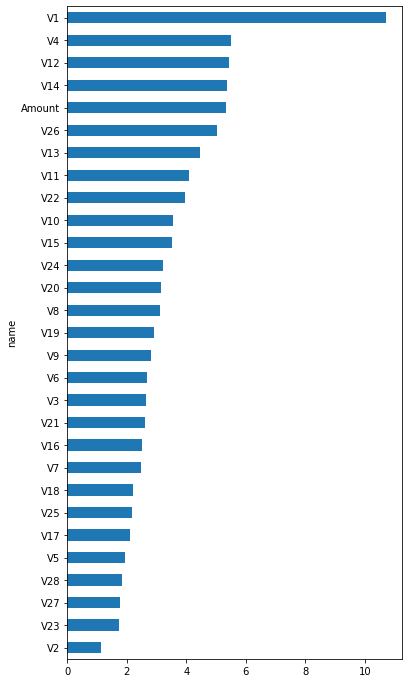

In [30]:
fi.set_index('name')['w'].plot(kind='barh',figsize=(6,12))